# MOVIE GENRE CLASSIFICATION
-----------------------------------

The objective is to develop a machine learning framework for genre prediction of movies using their plot summaries or textual data. This entails harnessing natural language processing (NLP) methods, notably TF-IDF (Term Frequency-Inverse Document Frequency).

Our foremost aim is to construct a model capable of autonomously assigning one or multiple genres to a movie, relying on the textual information available. Such a capability holds significance for tasks like movie categorization, database organization, recommendation systems, and content filtering.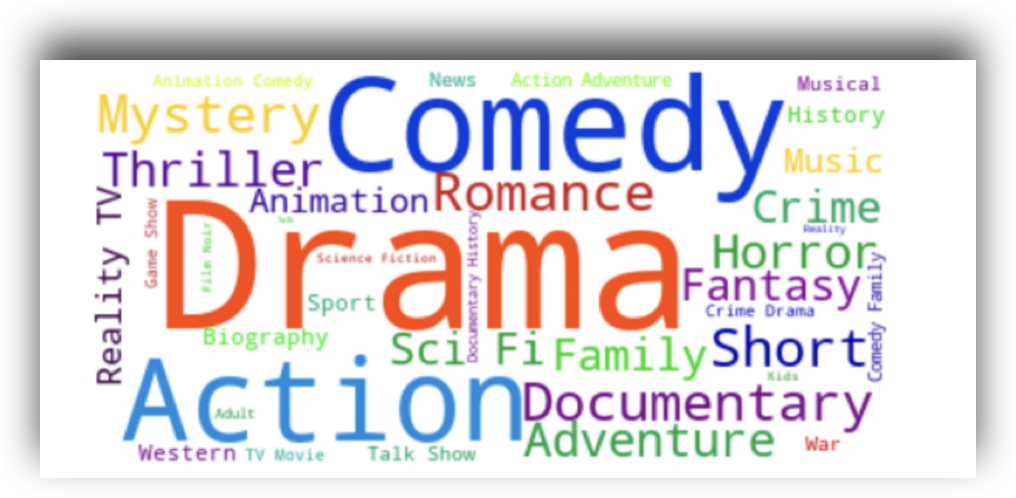

In [1]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:

train_data=pd.read_csv('/content/train_data.txt',sep=':::', names=['Title', 'Genre', 'Description'])
train_data

<ipython-input-2-fbd014867e87>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data=pd.read_csv('/content/train_data.txt',sep=':::', names=['Title', 'Genre', 'Description'])


,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
17548,"""The Dream Team with Annabelle and Michael"" (...",talk-show,The Dream Team with Annabelle and Michael is ...
17549,You Can't Hurry Love (2016),romance,Stunned from the premature passing of a child...
17550,A Little Water (2017),drama,"On the anniversary of a tragic accident, four..."
17551,Life of Josutty (2015),drama,Josutty is the son of Joseph and Shoshamma. H...


In [3]:
test_data=pd.read_csv('/content/test_data.txt',sep=':::', names=['Title','Description'])
test_data

<ipython-input-3-88282df80576>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data=pd.read_csv('/content/test_data.txt',sep=':::', names=['Title','Description'])


,Title,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...
18025,"""Awesome Games Done Quick"" (2011)",Awesome Games Done Quick and Summer Games Don...
18026,Her sey acik (2013),An independent feature length documentary fil...
18027,Dawn of Twilight (2004),"A professional assassin, known as Twilight, h..."
18028,Black Deutschland (2006),The documentary film BLACK DEUTSCHLAND is an ...


In [4]:
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [5]:
train_data.tail()

,Title,Genre,Description
17548,"""The Dream Team with Annabelle and Michael"" (...",talk-show,The Dream Team with Annabelle and Michael is ...
17549,You Can't Hurry Love (2016),romance,Stunned from the premature passing of a child...
17550,A Little Water (2017),drama,"On the anniversary of a tragic accident, four..."
17551,Life of Josutty (2015),drama,Josutty is the son of Joseph and Shoshamma. H...
17552,Jump Cut (1993),comedy,A good-nat


In [6]:
train_data.dtypes

Title          object
Genre          object
Description    object
dtype: object

In [7]:
train_data.shape

(17552, 3)

In [8]:
train_data.isna().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [9]:
train_data['Genre'].value_counts()

 drama           4389
 documentary     4231
 comedy          2399
 short           1690
 horror           693
 thriller         518
 action           419
 western          339
 reality-tv       293
 family           272
 adventure        262
 music            243
 sci-fi           221
 romance          213
 adult            189
 animation        170
 crime            135
 sport            129
 talk-show        128
 fantasy          111
 mystery          104
 musical           86
 biography         77
 history           75
 game-show         64
 news              58
 war               44
Name: Genre, dtype: int64

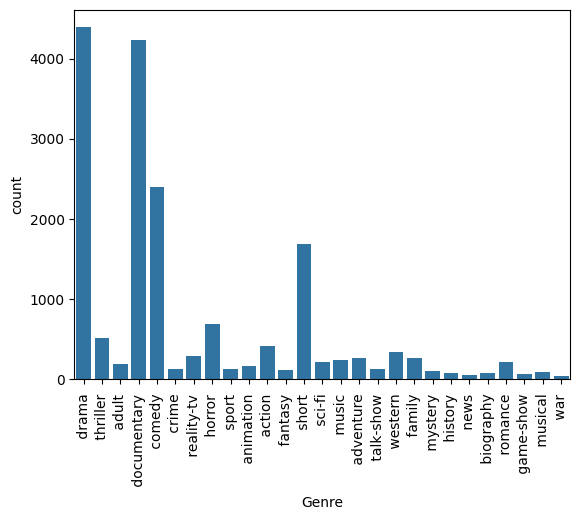

In [10]:
sns.countplot(x='Genre',data=train_data)
plt.xticks(rotation=90)
plt.show()

In [11]:
train_data

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
17548,"""The Dream Team with Annabelle and Michael"" (...",talk-show,The Dream Team with Annabelle and Michael is ...
17549,You Can't Hurry Love (2016),romance,Stunned from the premature passing of a child...
17550,A Little Water (2017),drama,"On the anniversary of a tragic accident, four..."
17551,Life of Josutty (2015),drama,Josutty is the son of Joseph and Shoshamma. H...


REMOVING UNNECCESSARY COLUMNS

In [12]:
train_data.drop(['Title'],axis=1,inplace=True)

In [13]:
tk=TweetTokenizer()


In [14]:
tweets=train_data.Description

In [15]:
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))

In [16]:
tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')

<ipython-input-16-90ec657a91c4>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')


In [17]:
tweets=tweets.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))

In [18]:
stemmer = SnowballStemmer('english')
tweets = tweets.apply(lambda x: ' '.join([stemmer.stem(i.lower()) for i in tk.tokenize(x)]))


Removing Stopwords

In [19]:
stop1 = stopwords.words('english')
tweets = tweets.apply(lambda x: [i for i in word_tokenize(x) if i not in stop1]).apply(lambda x: " ".join(x))


Vectorization

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data_train=vec.fit_transform(tweets)
print(data_train)
data_train.shape

  (0, 5360)	0.13250386877468207
  (0, 31574)	0.19481397959312632
  (0, 41003)	0.14907470135740697
  (0, 8025)	0.11519643258742084
  (0, 3632)	0.19909950964116924
  (0, 12890)	0.20748327520631796
  (0, 9472)	0.19685921152931513
  (0, 32666)	0.13422453962171413
  (0, 15692)	0.07098109172912828
  (0, 8980)	0.10766897226562709
  (0, 15814)	0.11015084844705347
  (0, 24890)	0.0682945654592571
  (0, 24369)	0.05740844244972577
  (0, 1760)	0.1167708865096872
  (0, 7785)	0.13349222683314452
  (0, 46260)	0.11047358128729204
  (0, 19930)	0.12128407295491868
  (0, 46509)	0.1852833846663057
  (0, 33197)	0.11899702904191055
  (0, 14001)	0.09250872595470817
  (0, 14319)	0.1622286603117328
  (0, 44353)	0.08596838148725042
  (0, 2550)	0.12362754024161784
  (0, 8219)	0.13792240557931376
  (0, 39840)	0.18662691257555014
  :	:
  (17550, 8466)	0.08427622725570899
  (17550, 27194)	0.08305586325697292
  (17550, 8212)	0.10163582052780545
  (17550, 42193)	0.09036889853795349
  (17550, 44290)	0.10767530666561873

(17552, 47396)

In [21]:
train_data

,Genre,Description
1,drama,Listening in to a conversation between his do...
2,thriller,A brother and sister with a past incestuous r...
3,adult,As the bus empties the students for their fie...
4,drama,To help their unemployed father make ends mee...
5,drama,The film's title refers not only to the un-re...
...,...,...
17548,talk-show,The Dream Team with Annabelle and Michael is ...
17549,romance,Stunned from the premature passing of a child...
17550,drama,"On the anniversary of a tragic accident, four..."
17551,drama,Josutty is the son of Joseph and Shoshamma. H...


In [22]:
y = train_data['Genre']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_train, y, test_size=0.3, random_state=42)

In [23]:
x_train

<12286x47396 sparse matrix of type '<class 'numpy.float64'>'
	with 588074 stored elements in Compressed Sparse Row format>

In [24]:
x_test

<5266x47396 sparse matrix of type '<class 'numpy.float64'>'
	with 253542 stored elements in Compressed Sparse Row format>

In [25]:
y_train

2819           horror 
220             drama 
17447     documentary 
17193           crime 
7336            adult 
             ...      
11285          comedy 
11965     documentary 
5391            drama 
861             drama 
15796     documentary 
Name: Genre, Length: 12286, dtype: object

In [26]:
y_test

6499      documentary 
9596            drama 
11727           drama 
14605           drama 
3782            drama 
             ...      
16380           drama 
96        documentary 
9836           comedy 
2612            drama 
10985           short 
Name: Genre, Length: 5266, dtype: object

In [27]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
svm = SVC()
tree = DecisionTreeClassifier(criterion='entropy')
random = RandomForestClassifier(random_state=42)
models = [svm, tree, random]


In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
for model in models:
    print(model)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

SVC()
Accuracy: 0.5110140524116977
Confusion Matrix:
 [[   0    0    0    0    0   25    0   28   84    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    1    3    0    0   20    0    5   19    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    2    0    0   11    0   23   48    0    0    0    0    1
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    7    0   11   23    0    0    0    0    1
     0    0    0    0    0    0    0    3    0    0    0    0    0]
 [   0    0    0    0    0    0    0   19    5    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0  298    0   64  327    0    0    0    0    2
     0    0    0    0    0    0    0    5    0    0    0    0    0]
 [   0    0    0    0    0    4    0    6   42    0    0    0    0    0
     0    0    0    0    0    0   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.3289023927079377
Confusion Matrix:
 [[  2   2   2   3   1  22   0  25  43   3   0   1   0   6   1   0   1   0
    3   2   2   3   0   0   7   1   7]
 [  0   4   4   1   0  11   0   7  10   1   0   0   0   4   0   0   0   0
    1   0   0   3   0   0   1   1   0]
 [  2   2   5   1   0  11   0  17  22   1   1   1   0   5   0   0   3   0
    0   0   4   6   0   2   1   1   0]
 [  2   2   0   1   0   8   0  10   9   2   0   0   0   4   0   2   0   0
    1   0   0   3   0   0   0   0   1]
 [  0   0   0   0   2   1   0  10   4   0   0   0   1   0   0   0   0   1
    0   1   0   4   0   0   0   0   0]
 [ 13   7   6   5   0 224   1  87 196  14   1   1   1  23   4   7   1   0
   12   6   3  59   3   3  11   1   7]
 [  0   0   1   0   0   5   1  10  11   3   0   0   0   0   0   0   2   1
    0   0   1  10   0   0   1   1   5]
 [ 14   3   8  10   6  91   0 702 219  14   6   3   4  20   7   4   0   1
    9   7  11 103   4   9  12   3   4]
 [ 17   3  21   7   2 188   8 203 583  22   5   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
test_data.head()

,Title,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [30]:
test_data.tail()

,Title,Description
18025,"""Awesome Games Done Quick"" (2011)",Awesome Games Done Quick and Summer Games Don...
18026,Her sey acik (2013),An independent feature length documentary fil...
18027,Dawn of Twilight (2004),"A professional assassin, known as Twilight, h..."
18028,Black Deutschland (2006),The documentary film BLACK DEUTSCHLAND is an ...
18029,Injecting Aluminum (2017),"In the early 90s, a mysterious muscular disea..."


In [31]:
test_data.shape

(18029, 2)

In [32]:
test_data.isna().sum()

Title          0
Description    0
dtype: int64

In [33]:
tweet=test_data.Description

In [34]:
tweet=tweet.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))

In [35]:
tweet=tweet.str.replace('[^a-zA-Z0-9]+',' ')

<ipython-input-35-8d82a6d6890f>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet=tweet.str.replace('[^a-zA-Z0-9]+',' ')


In [36]:
tweet=tweet.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))

In [37]:
stemmer = SnowballStemmer('english')
tweet = tweet.apply(lambda x: ' '.join([stemmer.stem(i.lower()) for i in tk.tokenize(x)]))


In [38]:
stop11 = stopwords.words('english')
tweet= tweet.apply(lambda x: [i for i in word_tokenize(x) if i not in stop1]).apply(lambda x: " ".join(x))


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
test_data=vec.fit_transform(tweets)
print(test_data)
test_data.shape

  (0, 5360)	0.13250386877468207
  (0, 31574)	0.19481397959312632
  (0, 41003)	0.14907470135740697
  (0, 8025)	0.11519643258742084
  (0, 3632)	0.19909950964116924
  (0, 12890)	0.20748327520631796
  (0, 9472)	0.19685921152931513
  (0, 32666)	0.13422453962171413
  (0, 15692)	0.07098109172912828
  (0, 8980)	0.10766897226562709
  (0, 15814)	0.11015084844705347
  (0, 24890)	0.0682945654592571
  (0, 24369)	0.05740844244972577
  (0, 1760)	0.1167708865096872
  (0, 7785)	0.13349222683314452
  (0, 46260)	0.11047358128729204
  (0, 19930)	0.12128407295491868
  (0, 46509)	0.1852833846663057
  (0, 33197)	0.11899702904191055
  (0, 14001)	0.09250872595470817
  (0, 14319)	0.1622286603117328
  (0, 44353)	0.08596838148725042
  (0, 2550)	0.12362754024161784
  (0, 8219)	0.13792240557931376
  (0, 39840)	0.18662691257555014
  :	:
  (17550, 8466)	0.08427622725570899
  (17550, 27194)	0.08305586325697292
  (17550, 8212)	0.10163582052780545
  (17550, 42193)	0.09036889853795349
  (17550, 44290)	0.10767530666561873

(17552, 47396)

In [40]:
test_data

<17552x47396 sparse matrix of type '<class 'numpy.float64'>'
	with 841616 stored elements in Compressed Sparse Row format>

In [43]:
for model in models:
    print(model)
    model.fit(x_train, y_train)
    y_pred = model.predict(test_data)
    print(y_pred)


SVC()
[' drama ' ' thriller ' ' adult ' ... ' drama ' ' drama ' ' comedy ']
DecisionTreeClassifier(criterion='entropy')
[' documentary ' ' thriller ' ' adult ' ... ' drama ' ' drama ' ' comedy ']
RandomForestClassifier(random_state=42)
[' drama ' ' thriller ' ' adult ' ... ' drama ' ' drama ' ' comedy ']
